In [1]:
import numpy as np
import xgboost as xgb
import pandas as pd
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.utils.class_weight import compute_sample_weight
from scipy.stats import randint, uniform
from pdb import set_trace

In [2]:
path = '/home/ec2-user/MLNotebooks/'

### Confusion matrix and individual class matrix function

In [3]:
def confusio_matrix(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize=(8,4))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Cytosol', 'Mitochondria', 'Nuclear', 'Secretory']
    plt.title('Confusion Matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)

    for i in range(len(classNames)):
        for j in range(len(classNames)):
            plt.text(j,i,str(cm[i][j]), ha='center', va='center')
    plt.show()

def making_ind_confusio_matrix(title, count, percent, accur, preci, sens, spec, f1):
    plt.figure(figsize=(2,2))
    plt.clf()
    plt.imshow(count, interpolation='none', cmap=plt.cm.Wistia)
    classNames = ['True', 'False']
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
  
    for i in range(len(classNames)):
        for j in range(len(classNames)):
            s = str(count[i][j]) + '\n' + str(percent[i][j])
            plt.text(j,i,s, ha='center', va='center')
    plt.text(1.8, 0.5, 
             f'Accuracy: {accur}\nPrecision: {preci}\nSensitivity: {sens}\nSpecificty: {spec}\nF1 Score: {f1}')
    plt.show()
    
def cytosol_confusio_matrix(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)
    
    # tallying 
    TP = cm[0][0]
    FP = cm[1][0]+cm[2][0]+cm[3][0]
    FN = cm[0][1]+cm[0][2]+cm[0][3]
    TN = cm[1][1]+cm[1][2]+cm[1][3]+cm[2][1]+cm[2][2]+cm[2][3]+cm[3][1]+cm[3][2]+cm[3][3]
    assem_count = np.array([TP,FP,FN,TN]).reshape(2,2)
    total = sum(sum(cm))
    assem_percent = np.array([round((TP/total)*100, 2), round((FP/total)*100,2), round((FN/total)*100,2), round((TN/total)*100,2)]).reshape(2,2)
    
    # sensitivity and specificity
    sense = round((TP / (TP + FN)),2)
    speci = round((TN / (TN + FP)),2)
    accuracy = round(((TP + TN)/ total),2)
    precision = round((TP / (TP + FP)),2)
    f1_score = round((2/(1/precision + 1/sense)),2)
    
    making_ind_confusio_matrix('Cytosol', assem_count, assem_percent, accuracy, precision, sense, speci, f1_score)
    
def mito_confusio_matrix(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)
    
    # tallying 
    TP = cm[1][1]
    FP = cm[0][1]+cm[2][1]+cm[3][1]
    FN = cm[1][0]+cm[1][2]+cm[1][3]
    TN = cm[0][0]+cm[0][2]+cm[0][3]+cm[2][0]+cm[2][2]+cm[2][3]+cm[3][0]+cm[3][2]+cm[3][3]
    assem_count = np.array([TP,FP,FN,TN]).reshape(2,2)
    total = sum(sum(cm))
    assem_percent = np.array([round((TP/total)*100, 2), round((FP/total)*100,2), round((FN/total)*100,2), round((TN/total)*100,2)]).reshape(2,2)
    
    # sensitivity and specificity
    sense = round((TP / (TP + FN)),2)
    speci = round((TN / (TN + FP)),2)
    accuracy = round(((TP + TN)/ total),2)
    precision = round((TP / (TP + FP)),2)
    f1_score = round((2/(1/precision + 1/sense)),2)
    
    making_ind_confusio_matrix('Mitochondria', assem_count, assem_percent, accuracy, precision, sense, speci, f1_score)

def nuclear_confusio_matrix(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)
    
    # tallying 
    TP = cm[2][2]
    FP = cm[0][2]+cm[1][2]+cm[3][2]
    FN = cm[2][0]+cm[2][1]+cm[2][3]
    TN = cm[0][0]+cm[0][1]+cm[0][3]+cm[1][0]+cm[1][1]+cm[1][3]+cm[3][0]+cm[3][1]+cm[3][3]
    assem_count = np.array([TP,FP,FN,TN]).reshape(2,2)
    total = sum(sum(cm))
    assem_percent = np.array([round((TP/total)*100, 2), round((FP/total)*100,2), round((FN/total)*100,2), round((TN/total)*100,2)]).reshape(2,2)
    
    # sensitivity and specificity
    sense = round((TP / (TP + FN)),2)
    speci = round((TN / (TN + FP)),2)
    accuracy = round(((TP + TN)/ total),2)
    precision = round((TP / (TP + FP)),2)
    f1_score = round((2/(1/precision + 1/sense)),2)
    
    making_ind_confusio_matrix('Nuclear', assem_count, assem_percent, accuracy, precision, sense, speci, f1_score)

def secret_confusio_matrix(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)
    
    # tallying 
    TP = cm[3][3]
    FP = cm[0][3]+cm[1][3]+cm[2][3]
    FN = cm[3][0]+cm[3][1]+cm[3][2]
    TN = cm[0][0]+cm[0][1]+cm[0][2]+cm[1][0]+cm[1][1]+cm[1][2]+cm[2][0]+cm[2][1]+cm[2][2]
    assem_count = np.array([TP,FP,FN,TN]).reshape(2,2)
    total = sum(sum(cm))
    assem_percent = np.array([round((TP/total)*100, 2), round((FP/total)*100,2), round((FN/total)*100,2), round((TN/total)*100,2)]).reshape(2,2)
    
    # sensitivity and specificity
    sense = round((TP / (TP + FN)),2)
    speci = round((TN / (TN + FP)),2)
    accuracy = round(((TP + TN)/ total),2)
    precision = round((TP / (TP + FP)),2)
    f1_score = round((2/(1/precision + 1/sense)),2)
    
    making_ind_confusio_matrix('Secretory', assem_count, assem_percent, accuracy, precision, sense, speci, f1_score)

### Krug Data processing

In [4]:
# load training dataset
train = pd.read_csv(path + 'Datasets/kr_KeepPatientOrder_0922.csv')

# drop index and gene column
train.drop(columns=['Unnamed: 0','Gene'],inplace=True)
print("Shape of complete dataframe:", train.shape)

# check target class and number
Counter(train['Localization'])

# assign independent variables as X and target as Y
X = train.drop(columns='Localization')
Y = train['Localization']

# encode target
Y = LabelEncoder().fit_transform(Y)

# sanity check to see numbers match and matching with previous counter to create target dictionary
print(Counter(train['Localization']))
print(Counter(Y))
target_dict = {'Cytosol':0, 'Mitochondria':1, 'Nuclear':2, 'Secretory':3}

# train-valid split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

# sanity check
for i in [X_train, X_val, y_train, y_val]:
    print(i.shape)

Shape of complete dataframe: (6173, 245)
Counter({'Cytosol': 2803, 'Nuclear': 1703, 'Secretory': 1204, 'Mitochondria': 463})
Counter({0: 2803, 2: 1703, 3: 1204, 1: 463})
(4938, 244)
(1235, 244)
(4938,)
(1235,)


### XGboost Modeling

In [5]:
#{'gamma': 1, 'learning_rate': 0.09387966348355666, 'max_delta_step': 8, 'max_depth': 14, 'min_child_weight': 0.33695146459138847, 'num_parallel_tree': 9, 'subsample': 0.6191380112563695}

In [6]:
# calculate weight with sklearn compute_sample_weight
# {0: 0.589, 1: 3.483, 2: 0.887, 3: 1.126}
train_weight = compute_sample_weight('balanced', y_train)
valid_weight = compute_sample_weight('balanced', y_val)

# label the data matrix (similar to dataloader)
xg_train = xgb.DMatrix(X_train, label=y_train)
xg_valid = xgb.DMatrix(X_val, label=y_val)


# setup parameters for xgboost
param = {
    'objective': 'multi:softmax',
    'num_parallel_tree': 9,
    'eval_metric': ['merror', 'mlogloss'],
    'num_class': 4, # change this when you exclude 'unclassified'
    'max_depth': 14, # Maximum depth of a tree [0, +inf]
    'max_delta_step': 8, # Maximum delta step we allow each leaf output to be; this helps if class is imbalanced
    'min_child_weight': 0.33695146459138847,
    'eta': 0.09387966348355666,  #learning rate, range [0,1]
    'alpha': 2,
    'lambda': 8,
    'gamma': 1, # regularization hyperparameter; tuneable
    'subsample': 0.6191380112563695, # randomly sample X percent of the training data prior to growing trees.
    'sampling_method': 'uniform', # avail only tree method is gpu_hist
    'tree_method': 'gpu_hist', # Use GPU for faster training
}

watchlist = [(xg_train, 'training'), (xg_valid, 'validation')]

evals_result = {}

bst = xgb.train(
                params = param, 
                dtrain = xg_train,
                num_boost_round = 1000,
                evals = watchlist,
                early_stopping_rounds=50,
                verbose_eval=1000,
                evals_result=evals_result)

[0]	training-merror:0.15411	training-mlogloss:1.29600	validation-merror:0.28907	validation-mlogloss:1.31361
[719]	training-merror:0.00466	training-mlogloss:0.10481	validation-merror:0.18785	validation-mlogloss:0.50581


In [7]:
# # of iteration where the best model occurs
bst.best_iteration

669

In [8]:
# # of rounds trained
bst.num_boosted_rounds()

720

In [9]:
# Initialize DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Iteration', 'Train_Accu', 'Valid_Accu', 'Cyto_Accu', 'Mito_Accu', 'Nucl_Accu', 
                                'Secr_Accu', 'Cyto_Precision', 'Mito_Precision', 'Nucl_Precision', 'Secr_Precision'])

for iteration in range(1, bst.best_iteration + 1):
    # Get the training and validation predictions and labels
    valid_pred = bst.predict(xg_valid, iteration_range=(0,iteration), )
    train_pred = bst.predict(xg_train, iteration_range=(0, iteration), )
    
    valid_a = accuracy_score(y_val, valid_pred)
    train_a = accuracy_score(y_train, train_pred)
    
    # Calculate precision and accuracy for each alss
    cm = confusion_matrix(y_val, valid_pred, normalize='true').diagonal()
    cyto_a = cm[0]
    mito_a = cm[1]
    nucl_a = cm[2]
    secr_a = cm[3]
    
    valid_precision = precision_score(y_val, valid_pred, average=None)
    cyto_p = valid_precision[0]
    mito_p = valid_precision[1]
    nucl_p = valid_precision[2]
    secr_p = valid_precision[3]

    #valid_recall = recall_score(y_val, valid_pred, average='weighted')
    #valid_f1 = f1_score(y_val, valid_pred, average='weighted')
    
    # Append metrics to DataFrame
    metrics_df.loc[iteration] = [iteration, train_a, valid_a, cyto_a, mito_a, nucl_a, secr_a, cyto_p, mito_p, nucl_p, secr_p]

# Print the metrics DataFrame
print(metrics_df)

     Iteration  Train_Accu  Valid_Accu  Cyto_Accu  Mito_Accu  Nucl_Accu   
1          1.0    0.845889    0.710931   0.877005   0.347826   0.680352  \
2          2.0    0.844876    0.709312   0.864528   0.380435   0.686217   
3          3.0    0.848927    0.721457   0.873440   0.423913   0.689150   
4          4.0    0.851762    0.727126   0.884135   0.434783   0.692082   
5          5.0    0.853989    0.727935   0.882353   0.423913   0.700880   
..         ...         ...         ...        ...        ...        ...   
665      665.0    0.995342    0.812146   0.912656   0.728261   0.741935   
666      666.0    0.995342    0.812146   0.912656   0.728261   0.741935   
667      667.0    0.995342    0.812146   0.912656   0.728261   0.741935   
668      668.0    0.995342    0.812146   0.912656   0.728261   0.741935   
669      669.0    0.995342    0.812146   0.912656   0.728261   0.741935   

     Secr_Accu  Cyto_Precision  Mito_Precision  Nucl_Precision  Secr_Precision  
1     0.506224    

### Feature importances inspection

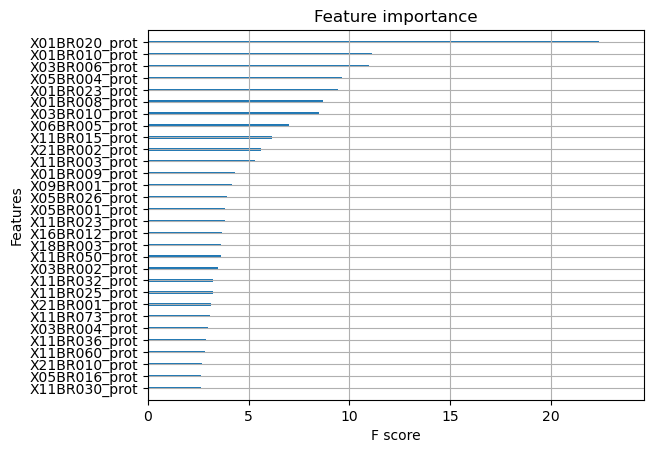

In [10]:
# Get feature importance
# importance = bst.get_score(importance_type='weight')
# 'weight' denotes the number of times a feature is used to split the data across all trees.

# Print feature importance
# print(importance)

# Plot feature importance
xgb.plot_importance(bst, max_num_features=30, importance_type='gain', show_values=False)
plt.show()

### K-fold validation

In [11]:
# Define K-fold cross-validation
epoch = 50
cv_results = xgb.cv(params=param, dtrain=xg_train, nfold=5,
                    num_boost_round=epoch, 
                    early_stopping_rounds=10, as_pandas=True, seed=123)
cv_stats = round(cv_results.mean(),4)

# results printed
print(f'Average of metrics of 5-fold validation for {epoch} epochs')
print(f'training classification error rate: {cv_stats[0]} ({cv_stats[1]})')
print(f'training multiclass logloss: {cv_stats[2]} ({cv_stats[3]})')
print(f'validation classification error rate: {cv_stats[4]} ({cv_stats[5]})')
print(f'validation multiclass logloss: {cv_stats[6]} ({cv_stats[7]})')

Average of metrics of 5-fold validation for 50 epochs
training classification error rate: 0.1052 (0.0014)
training multiclass logloss: 0.5936 (0.0016)
validation classification error rate: 0.2254 (0.0101)
validation multiclass logloss: 0.7656 (0.0114)


### Prediction and confusion matrices

Accuracy: 0.812
Balanced Accuracy: 0.773
              precision    recall  f1-score   support

     Cytosol       0.79      0.91      0.84       561
Mitochondria       0.94      0.73      0.82        92
     Nuclear       0.86      0.74      0.80       341
   Secretory       0.79      0.71      0.75       241

    accuracy                           0.81      1235
   macro avg       0.84      0.77      0.80      1235
weighted avg       0.82      0.81      0.81      1235

Macro avg = averaging the unweighted mean per label
Weighted avg = averaging the support-weighted mean per label


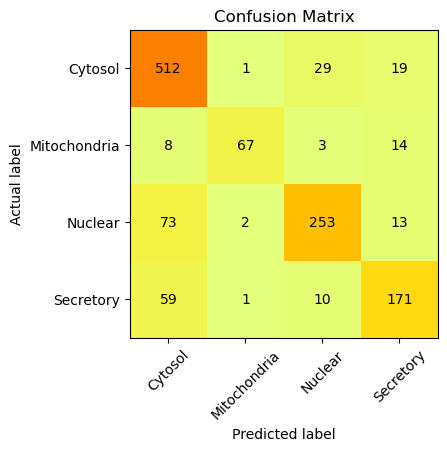

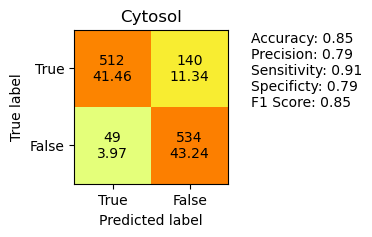

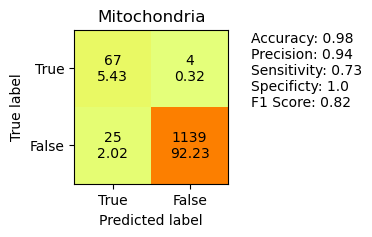

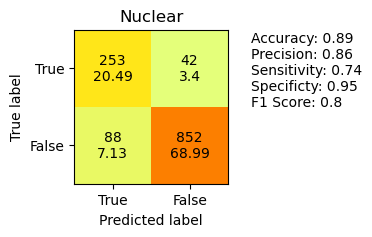

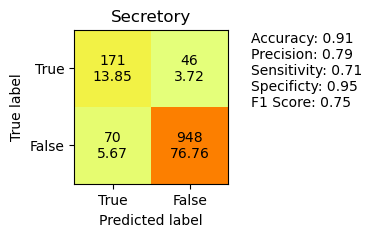

In [12]:
# get prediction
yhat = bst.predict(xg_valid, iteration_range=(0,bst.best_iteration+1))
score = accuracy_score(y_val, yhat)
score2 = balanced_accuracy_score(y_val, yhat)
print('Accuracy: %.3f' % score)
print('Balanced Accuracy: %.3f' % score2)

print(classification_report(y_val, yhat, target_names=['Cytosol', 'Mitochondria', 'Nuclear', 'Secretory']))
print("Macro avg = averaging the unweighted mean per label\nWeighted avg = averaging the support-weighted mean per label")
# print confusion matr
confusio_matrix(y_val, yhat)
cytosol_confusio_matrix(y_val, yhat)
mito_confusio_matrix(y_val, yhat)
nuclear_confusio_matrix(y_val, yhat)
secret_confusio_matrix(y_val, yhat)

### Figures

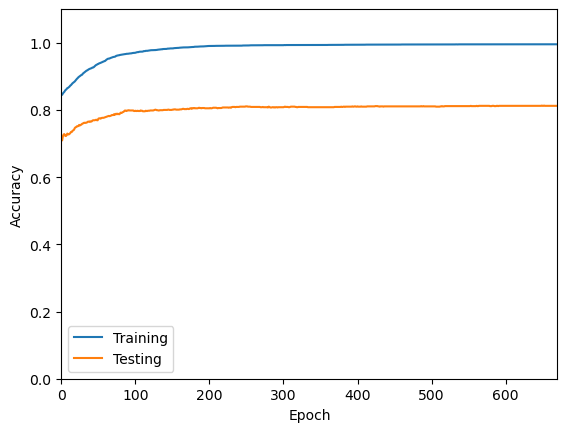

In [16]:
# plot precision
fig, ax = plt.subplots()
ax.plot(range(0, len(metrics_df)), metrics_df['Train_Accu'], label="Training")
ax.plot(range(0, len(metrics_df)), metrics_df['Valid_Accu'], label="Testing")
#ax.plot(range(0, len(metrics_df)), metrics_df['Cyto_Precision'], label="Cytosol")
#ax.plot(range(0, len(metrics_df)), metrics_df['Mito_Precision'], label="Mitochondria")
#ax.plot(range(0, len(metrics_df)), metrics_df['Nucl_Precision'], label="Nucleus")
#ax.plot(range(0, len(metrics_df)), metrics_df['Secr_Precision'], label="Secretory")

#ax.plot(range(0, len(metrics_df)), metrics_df['Valid Recall'], label="Recall")
#ax.plot(range(0, len(metrics_df)), metrics_df['Valid F1 Score'], label="F1 Score")
ax.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xlim([0, len(metrics_df)+1])
plt.ylim([0, 1.1])
#plt.ylabel("Classification Error")
#plt.title("Precision for each localization throughout training")
plt.show()
fig.savefig(path+"/XGBoost/krug_keeppatientorder.pdf")
#print('Precision = Positive predictions are truly positive')

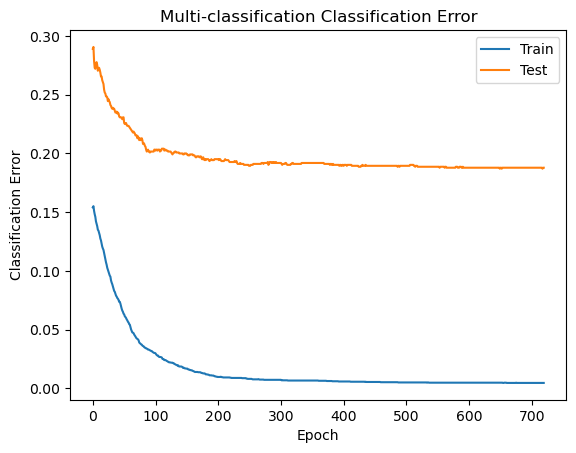

In [14]:
# plot merror
fig, ax = plt.subplots()
ax.plot(range(0, len(evals_result["training"]["merror"])), evals_result["training"]["merror"], label="Train")
ax.plot(range(0, len(evals_result["validation"]["merror"])), evals_result["validation"]["merror"], label="Test")
ax.legend()
plt.xlabel("Epoch")
plt.ylabel("Classification Error")
plt.title("Multi-classification Classification Error")
plt.show()

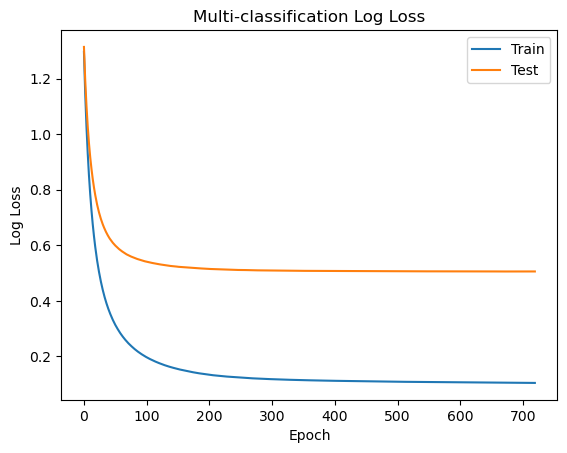

In [15]:
# plot log loss
fig, ax = plt.subplots()
ax.plot(range(0, len(evals_result["training"]["mlogloss"])), evals_result["training"]["mlogloss"], label="Train")
ax.plot(range(0, len(evals_result["validation"]["mlogloss"])), evals_result["validation"]["mlogloss"], label="Test")
ax.legend()
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Multi-classification Log Loss")
plt.show()

### Randomized Search Params

In [ ]:
# sample param
param = {
    'objective': 'multi:softmax',
    'num_parallel_tree': 1,
    'eval_metric': ['merror', 'mlogloss'],
    'num_class': 4, # change this when you exclude 'unclassified'
    'max_depth': 10, # Maximum depth of a tree [0, +inf]
    'max_delta_step': 2, # Maximum delta step we allow each leaf output to be; this helps if class is imbalanced
    'eta': 0.05,  #learning rate, range [0,1]
    'alpha': 0,
    'lambda': 1,
    'gamma': 1, # regularization hyperparameter; tuneable
    'subsample': 0.5, # randomly sample X percent of the training data prior to growing trees.
    'sampling_method': 'uniform', # avail only tree method is gpu_hist
    'tree_method': 'gpu_hist', # Use GPU for faster training
}

In [ ]:
# Define hyperparameters and their distributions
params_dist = {
    'num_parallel_tree': randint(1, 10),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3,15),
    'max_delta_step':randint(0,10),
    'min_child_weight': uniform(0,1),
    'gamma': randint(0,10),
    'subsample': uniform(0.1, 0.9),
}

# Create XGBoost model
model = xgb.XGBClassifier(objective = 'multi:softmax')

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(model, params_dist, n_iter=5, scoring='accuracy', cv=5, n_jobs=-1,
                                  return_train_score=False)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train, sample_weight=train_weight)

# Print the best hyperparameters
print(random_search.best_params_)


In [ ]:
pd.DataFrame(data=random_search.cv_results_)

In [ ]:
#{'gamma': 1, 'learning_rate': 0.09387966348355666, 'max_delta_step': 8, 'max_depth': 14, 'min_child_weight': 0.33695146459138847, 'num_parallel_tree': 9, 'subsample': 0.6191380112563695}